### Bike Sharing Assignment:

The data provided between the years 2018 and 2019 respectively.

### Problem Statement:

Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


### Objective:

This assignment is to build a multiple linear regression model for the prediction of demand for shared bikes.
<br>The model should be built taking the 'cnt' as the target variable.

### 1 - Importing and Understanding Data:

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

bike_data = pd.read_csv("day.csv", header=0, low_memory=False)
bike_data.shape

(730, 16)

In [69]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [70]:
# Looking at the first five rows
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [71]:
# Check for any NULL values presented in data's.

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### The records doesn't have any missing values.

In [72]:
# Looking at all the column names
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

The important columns in the dataset are season, workingday, weathersit, temp, hum, windspeed, yr, mnth etc.

The target variable, which we want to build against the independent variables, is cnt. The strategy is to model the demand for shared bikes with the available independent variables.

### 2 - Data Cleaning:

In [73]:
# Check outliers at 5, 15, 25, 50, 75, 90, 95, 99
bike_data.describe(percentiles=[.05,.15,.25,.50,.75,.90,.95,.99])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
5%,37.450000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,8.747024,11.030712,40.741735,5.326052,88.450000,1177.050000,1330.000000
15%,110.350000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,11.621280,14.077988,48.183345,7.743468,193.050000,1770.500000,2164.450000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
90%,657.100000,4.000000,1.000000,11.000000,0.000000,6.000000,1.000000,2.000000,29.998347,33.908210,81.762500,19.833997,1872.000000,5895.400000,7293.800000


- The data's seems to be normal and NOT deviated much.
- The minimum value is very lesser when compare against 5% for the variables temp, hum and cnt.

In [74]:
bike_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [75]:
# Check for same value presented in all the columns. If so, we can drop.
bike_data.nunique()==1

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [76]:
# Check all the values are unique in a column

bike_data.nunique()==bike_data.shape[0]

instant        True
dteday         True
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

##### Drop the columns which are irrelavant for the analysis in the dataset.

1. The columns casual and registered are not required for analysis as it's a combination of cnt variable. (cnt is a target variable)
2. The column dteday is not needed since separate columns yr and mnth exist. Also the values are unique for all the entries.
3. The columns holiday and weekday are not required since workingday have the necessary value for both.
4. The column temp (Temperature in celcius) and atemp (Feeling Temparature in celcius) are describing same value in different prespective so, dropping atemp variable to avoid duplicates since temparature is standard term.
5. The column instant is not required for analysis as it's a unique index variable.


In [77]:
# Drop the columns 
drop_columns = ['casual','registered','dteday','holiday','weekday','atemp','instant']
bike_data.drop(drop_columns, axis=1, inplace=True)
bike_data.shape

(730, 9)

In [78]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   hum         730 non-null    float64
 7   windspeed   730 non-null    float64
 8   cnt         730 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.5 KB


### 3 - Data Visualisation:
#### Visualising Numeric Variables
`The 'season' and 'weathersit' are categorical variables so, excluding them.`

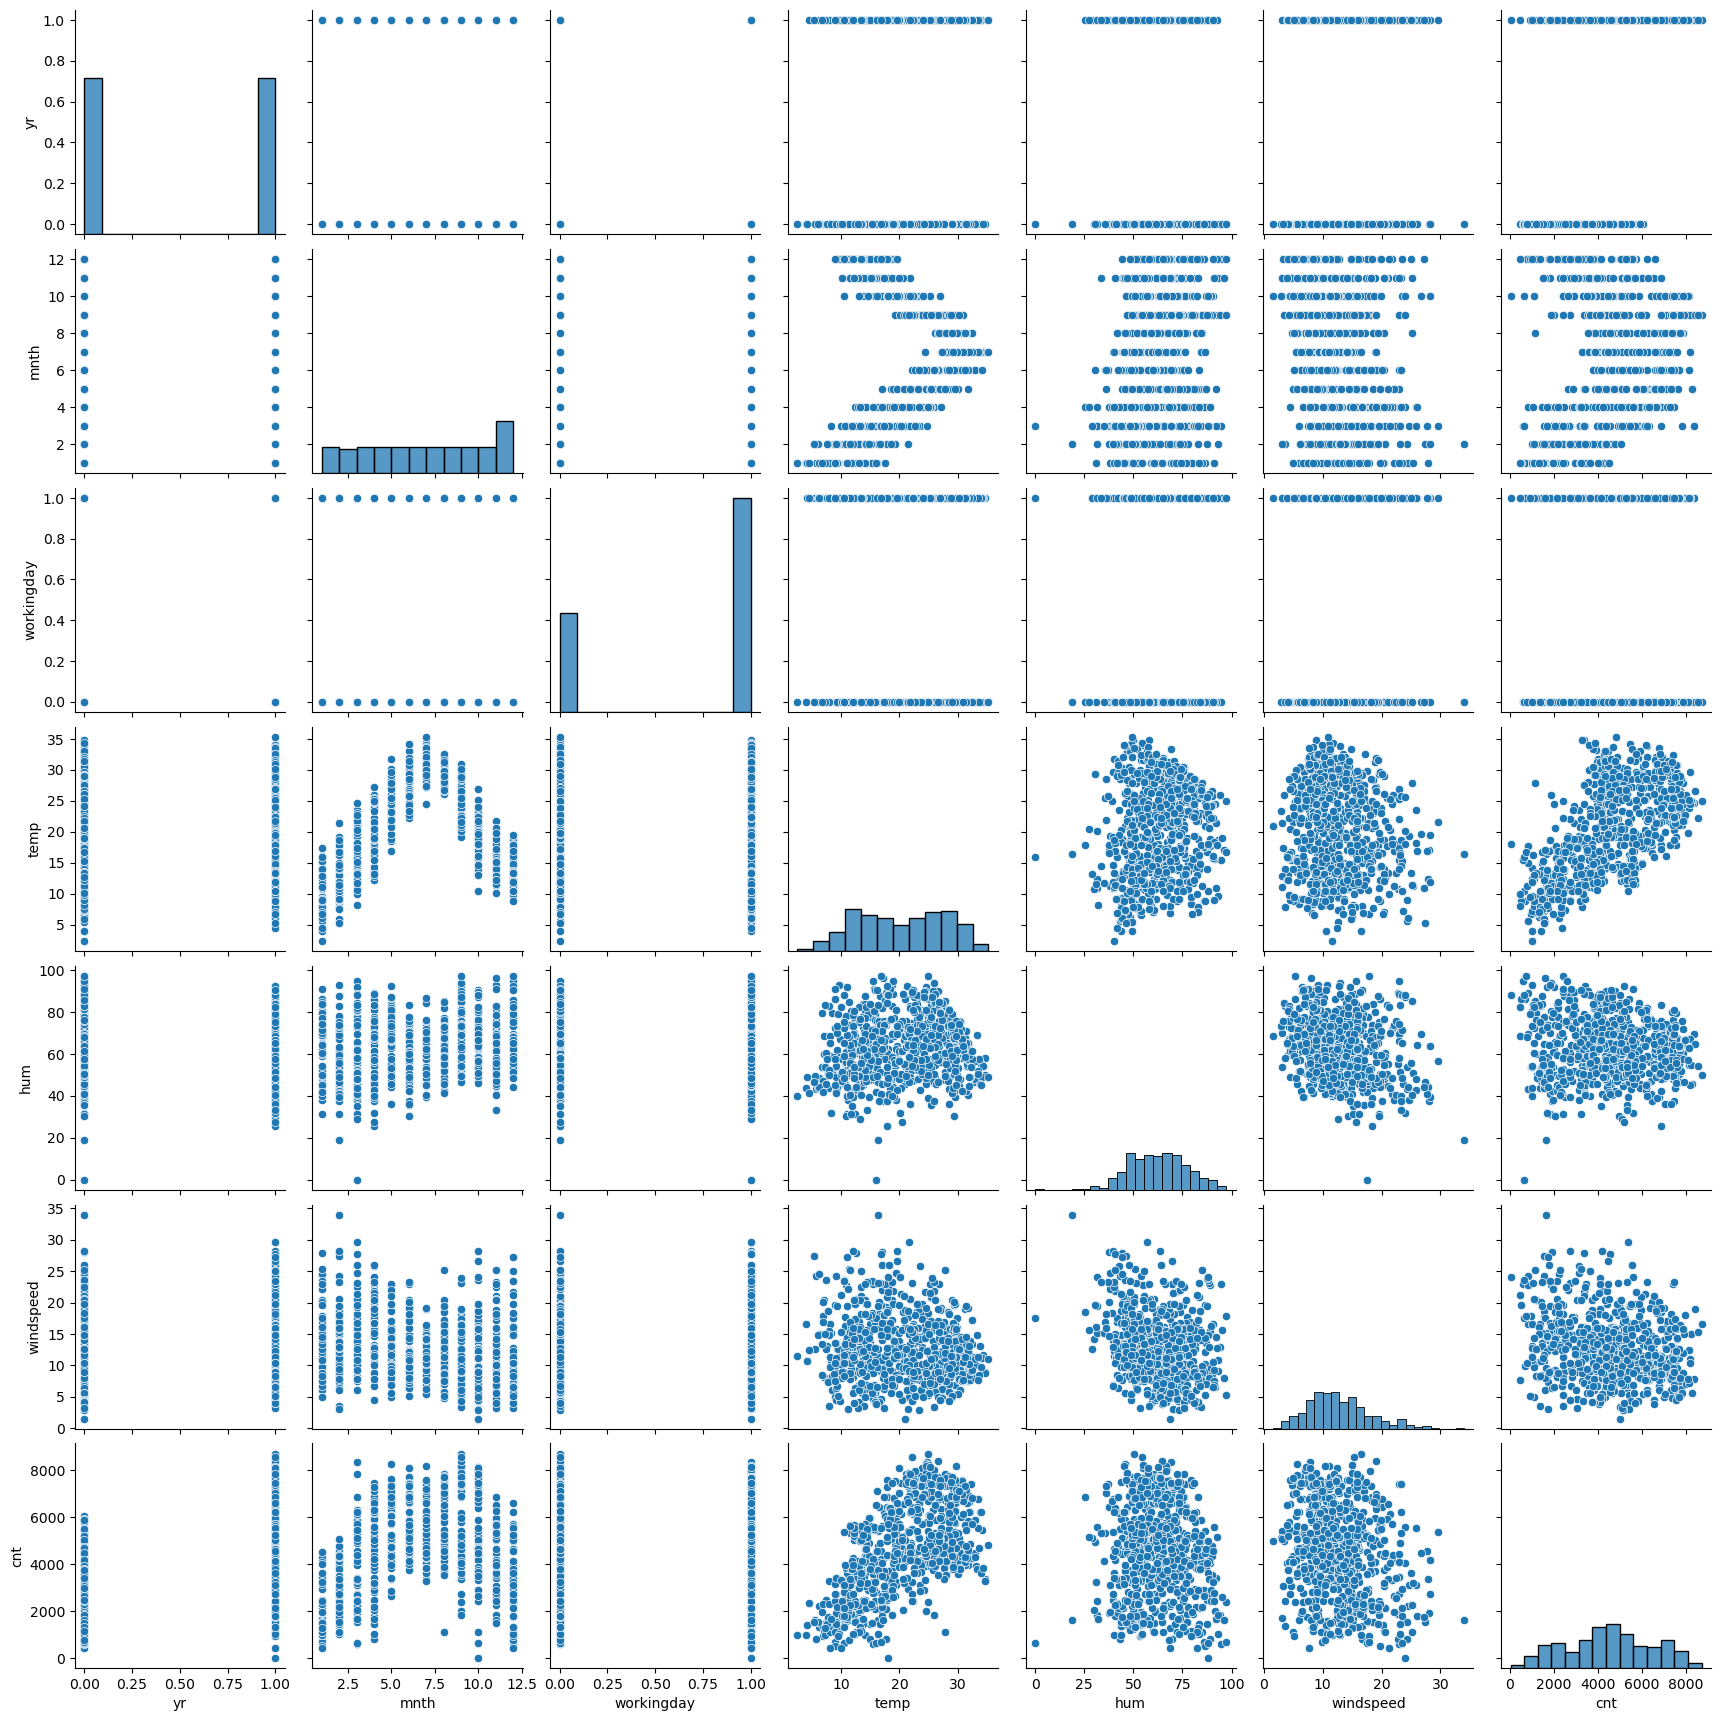

<Figure size 4000x3000 with 0 Axes>

In [79]:
sns.pairplot(bike_data[bike_data.columns[~bike_data.columns.isin(['season','weathersit'])]])
plt.figure(figsize=(40, 30))
plt.show()

<b>Univariate Observations:</b>
<br>`From the above visualization - the diagonal represents the univariate analysis in histogram representation.`<br>
- The 'yr' variable have no distinct variation among values.
- The variables 'temp', 'hue', 'windspeed' follows similar pattern of low in min and max ranges.
- The 'mnth' variable have slight increase in number on the November month.
- The 'workingday' variable have increase in usage of bikes on Weekend/Holiday rather in weekdays.


<B>Bivariate Observations:</b>
<br>`From the above visualization - except the diagonal represents the bivariate comparison w.r.t other variables.`<br>
- The 'yr' variable doesn't have any specific relation with other variables other than target 'cnt' variable.
- The 'mnth' variable can be related with 'temp', 'windspeed', 'hum' and 'cnt' variables but the pattern is not uniform.
- The 'workingday' variable have slight variation in the 'cnt' target variable.
- The 'temp', hum', 'windspeed' are having relations but not in uniform manner.

#### Visualising Categorical Variables

`For the categorical variables 'season' and 'weathersit', Let's make a boxplot.`

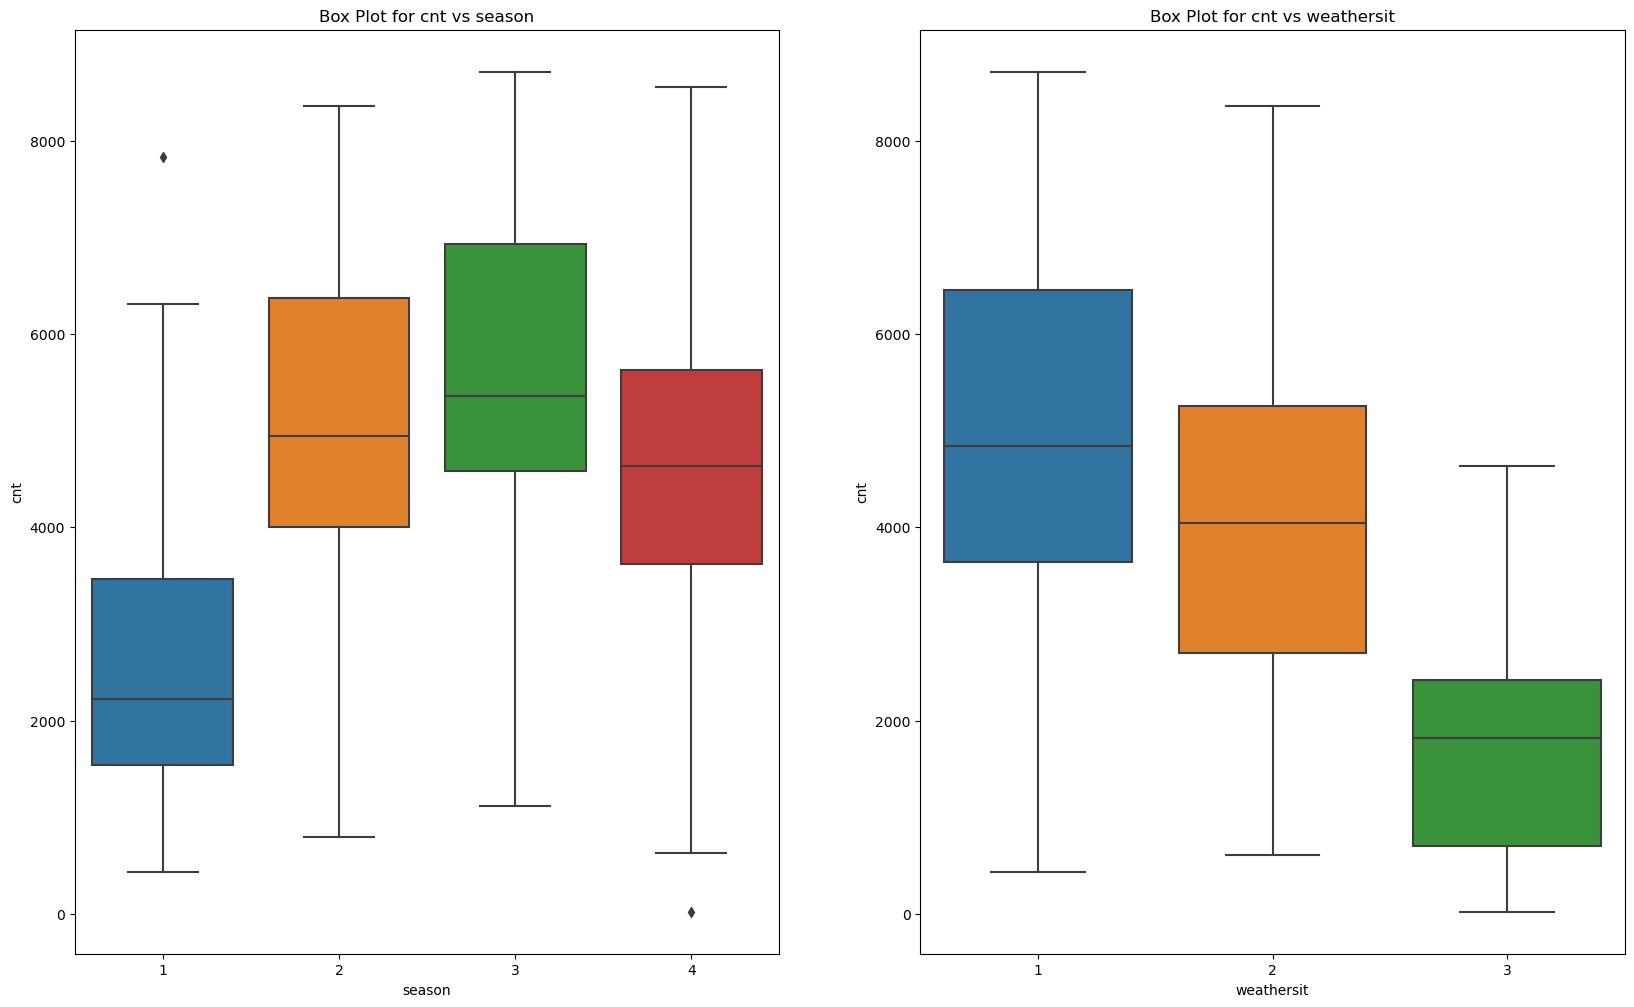

In [80]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.title("Box Plot for cnt vs season")
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.title("Box Plot for cnt vs weathersit")
plt.show()

#### Observations:
- The usage of bikes on the season 'summer' and 'autumn/fall' is more comapre to 'spring' and 'winter'.
- The 'weathersit' variable follows decremental usage of bikes over clear clouds, Mist and Light snow.

#### Mutivariate analysis:

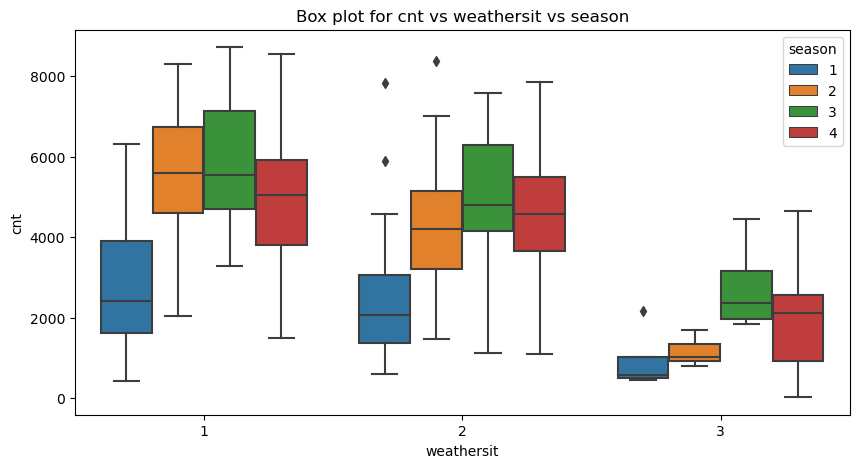

In [81]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'season', data = bike_data)
plt.title("Box plot for cnt vs weathersit vs season")
plt.show()

#### Observations:
- The summer and fall/autumn seasons have more demands in both clear and mist weatherset.
- This clearly represents the 'Light snow' weathersit happens on season fall/winter and the demand is low compare to other seasons.
- The overall demand is low in 'Light snow' weathersit irrespective of seasons.

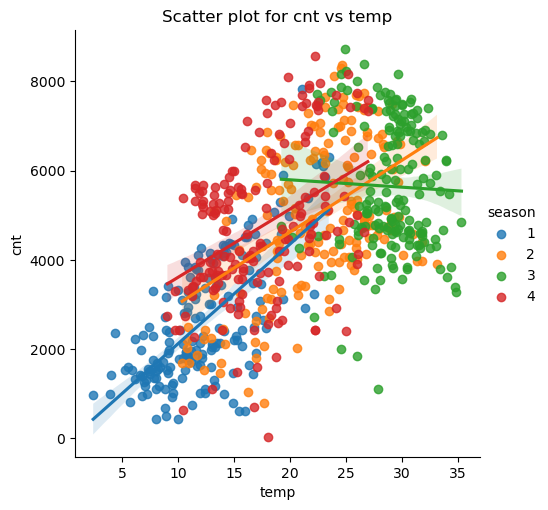

In [82]:
sns.lmplot(x = 'temp', y = 'cnt', hue = 'season', data = bike_data)
plt.title("Scatter plot for cnt vs temp")
plt.show()

- Able to see incremental distribution of temp w.r.t demand on seasons 'summer' and 'fall/autumn' over other seasons.

### 4 - Data Preparation:

In [83]:
# Column: season - Converting the values 1,2,3,4 to spring, summer, fall, winter as per data dictionary.
bike_data['season'] = bike_data['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike_data['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [84]:
# Column: weathersit - Converting the values 1,2,3,4 to Clear, Mist, Light Snow, Heavy Rain as per data dictionary.
bike_data['weathersit'] = bike_data['weathersit'].map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Heavy Rain"})
bike_data['weathersit'].unique()

array(['Mist', 'Clear', 'Light Snow'], dtype=object)

#### Create Dummy variables for the categorical variables.

The variable season has four levels and the variable weathersit has three levels.<br>
We need to convert these levels into integer - For this, we will use dummy variables.

In [85]:
# bike_data['season_summer'] = bike_data[bike_data['season']=='summer'

In [86]:
# Let's drop the first column from season dataframe using 'drop_first = 'True'
season = pd.get_dummies(bike_data['season'], prefix='season', drop_first = True)

# Add the results to the original bike_data dataframe
bike_data = pd.concat([bike_data, season], axis = 1)

# Now let's see the head of our dataframe.
bike_data.head()

,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,spring,0,1,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,1,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,1,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,1,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


<u>For Season - Dummy variable:</u>
<br>`[season_spring, season_summer, season_winter]`
- 000 will correspond to fall/autumn
- 001 will correspond to winter
- 010 will correspond to summer
- 100 will correspond to spring

In [87]:
# Let's drop the first column from weathersit dataframe using 'drop_first = 'True'
weathersit = pd.get_dummies(bike_data['weathersit'], prefix='weathersit', drop_first = True)

# Add the results to the original bike_data dataframe
bike_data = pd.concat([bike_data, weathersit], axis = 1)

# Now let's see the head of our dataframe.
bike_data.head()

,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
0,spring,0,1,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,1,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,1,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,1,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,1,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0


<u>For weathersit - Dummy variable:</u>
<br>`[weathersit_Light Snow, weathersit_Mist]`
- 00 will correspond to Clear
- 01 will correspond to Mist
- 10 will correspond to Light Snow

In [88]:
# Drop the original columns 'season' and 'weathersit' from the bike_data dataframe.

bike_data.drop(['season','weathersit'], axis = 1, inplace = True)
bike_data.head()

,yr,mnth,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
0,0,1,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


### 5 - Splitting the Data into Training and Testing Sets

In [89]:
from sklearn.model_selection import train_test_split

# Specified the random_state so that the train and test data set always have the same rows, respectively
# Splitted with 70% train data and 30% test data.

df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [90]:
df_train.shape

(510, 12)

In [91]:
df_test.shape

(219, 12)

### Rescaling the Features 

Using  MinMax scaling.

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [93]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_variables = ['mnth', 'temp', 'hum', 'windspeed', 'cnt']

df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

df_train.head()

,yr,mnth,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
653,1,0.818182,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1
728,1,1.000000,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1


#### Dividing into X and Y sets for the model building

In [94]:
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape,y_train.shape)

(510, 11) (510,)


### 6 - Building our model
#### RFE - Recursive feature elimination

In [95]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [96]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=9)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

The variables 'mnth' and 'workingday' has been eliminated from the train dataset by RFE automative approach.

In [97]:
rfe_selected_cols = X_train.columns[rfe.support_]
rfe_selected_cols

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

#### Building a linear model using statsmodel

In [98]:
# Creating X_train_rfe dataframe with RFE selected variables/columns.
X_train_rfe = X_train[rfe_selected_cols]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

# Run the linear model
lm = sm.OLS(y_train,X_train_lm).fit()


In [99]:
# Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.3
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          5.20e-182
Time:                        20:24:25   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     500   BIC:                            -899.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

#### Checking VIF

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,27.00
1,temp,14.79
3,windspeed,4.64
4,season_spring,3.70
6,season_winter,3.04
8,weathersit_Mist,2.27
5,season_summer,2.24
0,yr,2.07
7,weathersit_Light Snow,1.23


#### The VIF value is greater than 5 so, dropping the variable 'hum' and updating the model.
`Note: we need to drop one column at at time.`

In [102]:
# As the VIF value is greater than 5 so, dropping the variable hum and updating the model.
X = X_train_rfe.drop('hum', 1,)

In [103]:
# Re-Build a second fitted model
X_train_lm = sm.add_constant(X)
lm_2 = sm.OLS(y_train, X_train_lm).fit()

In [104]:
# Print the summary of the model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          1.51e-180
Time:                        20:24:25   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     501   BIC:                            -892.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.55
0,yr,2.07
3,season_spring,1.94
4,season_summer,1.79
5,season_winter,1.60
7,weathersit_Mist,1.52
6,weathersit_Light Snow,1.08


#### Note: Both the VIFs and p-values are within an acceptable range so, we can proceed to make our predictions using this model.

### 7 - Residual Analysis of the train data

In [106]:
y_train_predict = lm_2.predict(X_train_lm)

<b>`R-Squared value for the TRAIN data set.`

In [107]:
# Calculate the R Square.
from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)

0.8190634571062118

Text(0.5, 0, 'Errors')

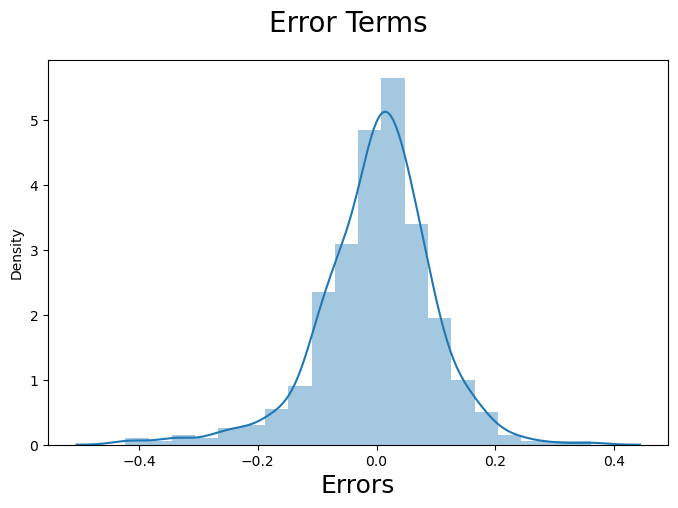

In [108]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8, 5))
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### 8 - Making Predictions using the final model
#### Applying the scaling on the test sets

In [109]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_variables = ['mnth', 'temp', 'hum', 'windspeed', 'cnt']

# Here, no need to fit - Only transform required in test data.
df_test[num_variables] = scaler.transform(df_test[num_variables])

df_test.head()

,yr,mnth,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
184,0,0.545455,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1
535,1,0.454545,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0
299,0,0.818182,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,1
221,0,0.636364,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0
152,0,0.454545,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0


#### Dividing into X_test and y_test

In [110]:
y_test = df_test.pop('cnt')
X_test = df_test

In [111]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

X_test_new.head()

,yr,temp,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
184,0,0.831783,0.084219,0,0,0,0,1
535,1,0.901354,0.153728,0,1,0,0,0
299,0,0.511964,0.334206,0,0,1,0,1
221,0,0.881625,0.339570,0,0,0,0,0
152,0,0.817246,0.537414,0,1,0,0,0


In [112]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Make predictions
y_pred = lm_2.predict(X_test_new)

### 9 - Model Evaluation

Text(0, 0.5, 'y_pred')

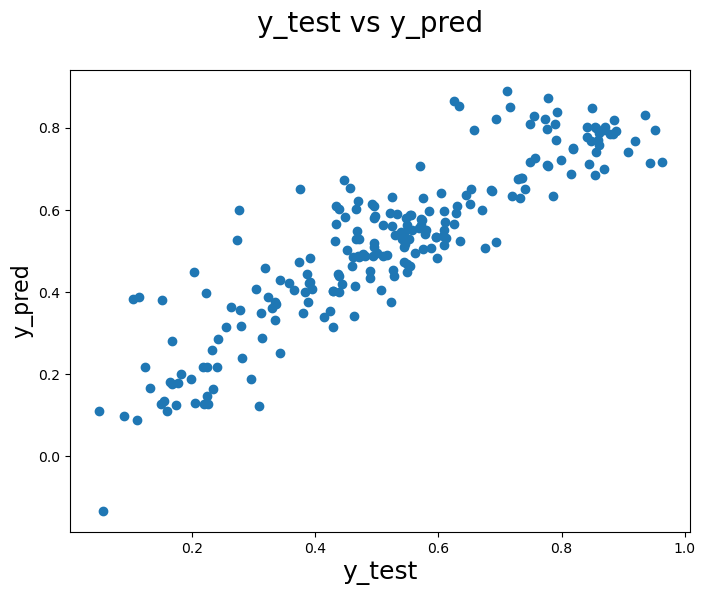

In [113]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

#### Calculate the R Square.

<b>`R-Squared value for the TEST data set.`

In [114]:
# Calculate the R Square for Test data.
r2_score(y_test, y_pred)

0.7967360957694913

#### The below list of variables are significant in predicting the demand for shared bikes (target demand variable - cnt).

In [115]:
significant_variables = lm_2.params
significant_variables.pop('const')
significant_variables

yr                       0.234360
temp                     0.468230
windspeed               -0.155943
season_spring           -0.083718
season_summer            0.038099
season_winter            0.074184
weathersit_Light Snow   -0.275934
weathersit_Mist         -0.074992
dtype: float64